# Загрузка данных

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lesson 14/bank_clients_transactions.csv')

In [4]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


# Приведение столбцов к стилю camel_case

In [5]:
def to_camel_case(snake_str):
    components = snake_str.split(' ')
    # Capitalize the first letter of each component except the first one
    # and join them together to form camelCase
    return components[0].lower() + ''.join(x.title() for x in components[1:])

df.columns = [to_camel_case(col) for col in df.columns]

df.head()

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(Inr)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


# Приведение типов данных

In [6]:
#привести дату к типу datetime
df['customerdob'] = pd.to_datetime(df['customerdob'], format='%d/%m/%y', errors='coerce')
df['transactiondate'] = pd.to_datetime(df['transactiondate'], format='%d/%m/%y', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   transactionid           1048567 non-null  object        
 1   customerid              1048567 non-null  object        
 2   customerdob             987831 non-null   datetime64[ns]
 3   custgender              1047467 non-null  object        
 4   custlocation            1048416 non-null  object        
 5   custaccountbalance      1046198 non-null  float64       
 6   transactiondate         1048567 non-null  datetime64[ns]
 7   transactiontime         1048567 non-null  int64         
 8   transactionamount(Inr)  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


# Поиск дублей и пропусков в данных

In [7]:
print(f"Количество дубликатов: {df.duplicated().sum()}")
print("Количество пропущенных значений по столбцам:")
print(df.isnull().sum())

Количество дубликатов: 0
Количество пропущенных значений по столбцам:
transactionid                 0
customerid                    0
customerdob               60736
custgender                 1100
custlocation                151
custaccountbalance         2369
transactiondate               0
transactiontime               0
transactionamount(Inr)        0
dtype: int64


## Обработка пропущенных значений

Принимая во внимание количество пропущенных значений, для сохранения целостности данных и упрощения дальнейшего анализа, я удалю строки, содержащие `NaN` значения в любых столбцах. Это может уменьшить общее количество записей в DataFrame.

In [8]:
print(f"Количество строк до удаления пропусков: {df.shape[0]}")
df.dropna(inplace=True)
print(f"Количество строк после удаления пропусков: {df.shape[0]}")
print("\nКоличество пропущенных значений после удаления:")
print(df.isnull().sum())

Количество строк до удаления пропусков: 1048567
Количество строк после удаления пропусков: 985322

Количество пропущенных значений после удаления:
transactionid             0
customerid                0
customerdob               0
custgender                0
custlocation              0
custaccountbalance        0
transactiondate           0
transactiontime           0
transactionamount(Inr)    0
dtype: int64


In [9]:
df.columns

Index(['transactionid', 'customerid', 'customerdob', 'custgender',
       'custlocation', 'custaccountbalance', 'transactiondate',
       'transactiontime', 'transactionamount(Inr)'],
      dtype='object')

# Исследовательский анализ данных

In [10]:
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(Inr)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [11]:
# 1 сколько уникальных клиентов?

In [12]:
unique_customers = df['customerid'].nunique()
print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных клиентов: 839081


In [13]:
# 2 Общее количество транзакций

In [14]:
total_transactions = df['transactionid'].count()
print(f"общее количество транзакций: {total_transactions}")

общее количество транзакций: 985322


In [15]:
# 3 сколько в среднем транзакций приходится на одного клиента?

In [16]:
average_transactions_per_customer = df.shape[0] / unique_customers
print(f"В среднем транзакций на одного клиента: {average_transactions_per_customer:.2f}")

В среднем транзакций на одного клиента: 1.17


In [17]:
# 4 изучить распределение и размах величин CustAccountBalance и TransactionAmount

In [18]:
#Подготовка данных и импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [19]:
df['custaccountbalance'] = pd.to_numeric(df['custaccountbalance'], errors='coerce')
df['transactionamount(Inr)'] = pd.to_numeric(df['transactionamount(Inr)'], errors='coerce')

df_clean = df[['custaccountbalance', 'transactionamount(Inr)']].dropna()
print("Описательная статистика:")
print(df_clean.describe())

Описательная статистика:
       custaccountbalance  transactionamount(Inr)
count        9.853220e+05            9.853220e+05
mean         1.060612e+05            1.452425e+03
std          8.179054e+05            6.139765e+03
min          0.000000e+00            0.000000e+00
25%          4.582132e+03            1.510000e+02
50%          1.600630e+04            4.310000e+02
75%          5.375908e+04            1.125000e+03
max          1.150355e+08            1.560035e+06


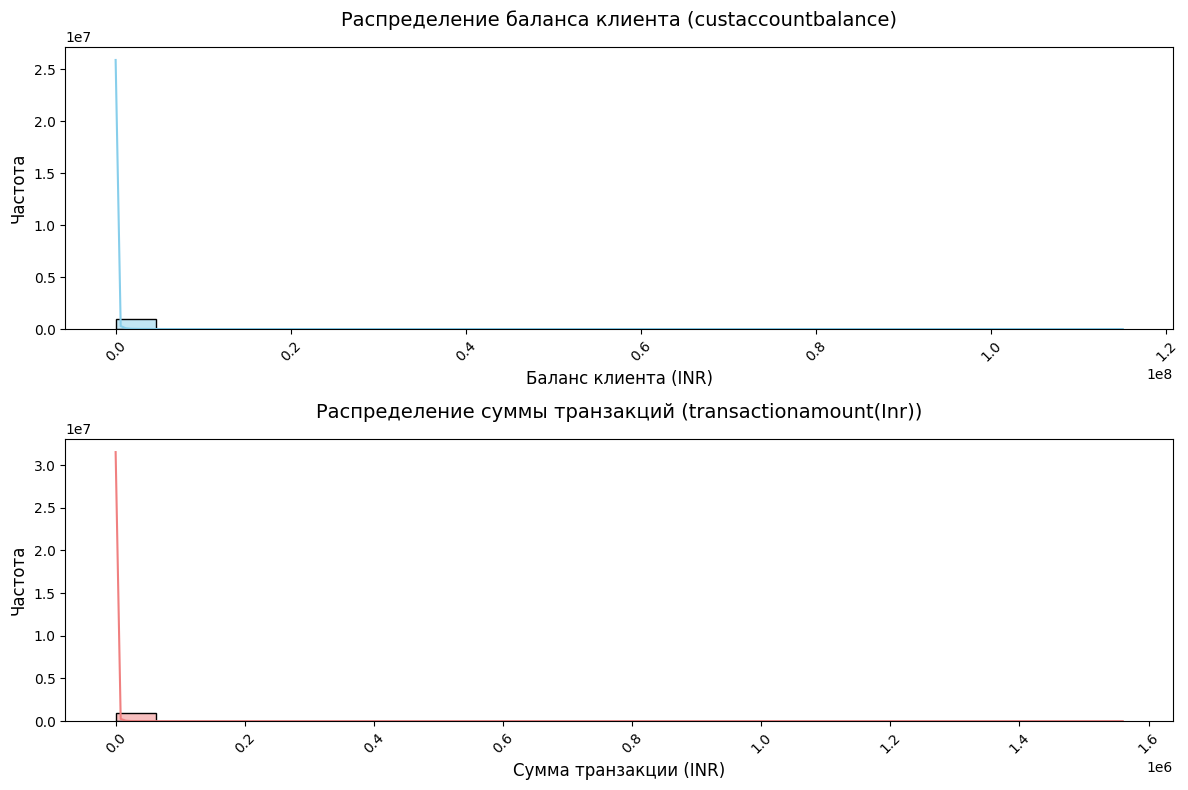

In [20]:
#3. Гистограммы с KDE (распределение)
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Гистограмма для custaccountbalance
sns.histplot(
    data=df_clean,
    x='custaccountbalance',
    bins=25,
    kde=True,
    color='skyblue',
    ax=axes[0]
)
axes[0].set_title('Распределение баланса клиента (custaccountbalance)', fontsize=14, pad=15)
axes[0].set_xlabel('Баланс клиента (INR)', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)

# Подписи с поворотом (если метки длинные)
axes[0].tick_params(axis='x', rotation=45)

# Гистограмма для transactionamount(Inr)
sns.histplot(
    data=df_clean,
    x='transactionamount(Inr)',
    bins=25,
    kde=True,
    color='lightcoral',
    ax=axes[1]
)
axes[1].set_title('Распределение суммы транзакций (transactionamount(Inr))', fontsize=14, pad=15)
axes[1].set_xlabel('Сумма транзакции (INR)', fontsize=12)
axes[1].set_ylabel('Частота', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

4 Анализ гистограмм  **Распределение баланса клиента (CustAccountBalance)** —( верхний график.) и
 **Распределение суммы транзакций (TransactionAmount (INR))** —( нижний график.)  показывает, что  
Оба распределения **асимметричны с доминированием низких значений и редкими крупными выбросами**. Это характерно для ситуации, где **большая часть клиентов/операций — мелкие, а значительная масса средств/объёмов приходится на небольшую группу**



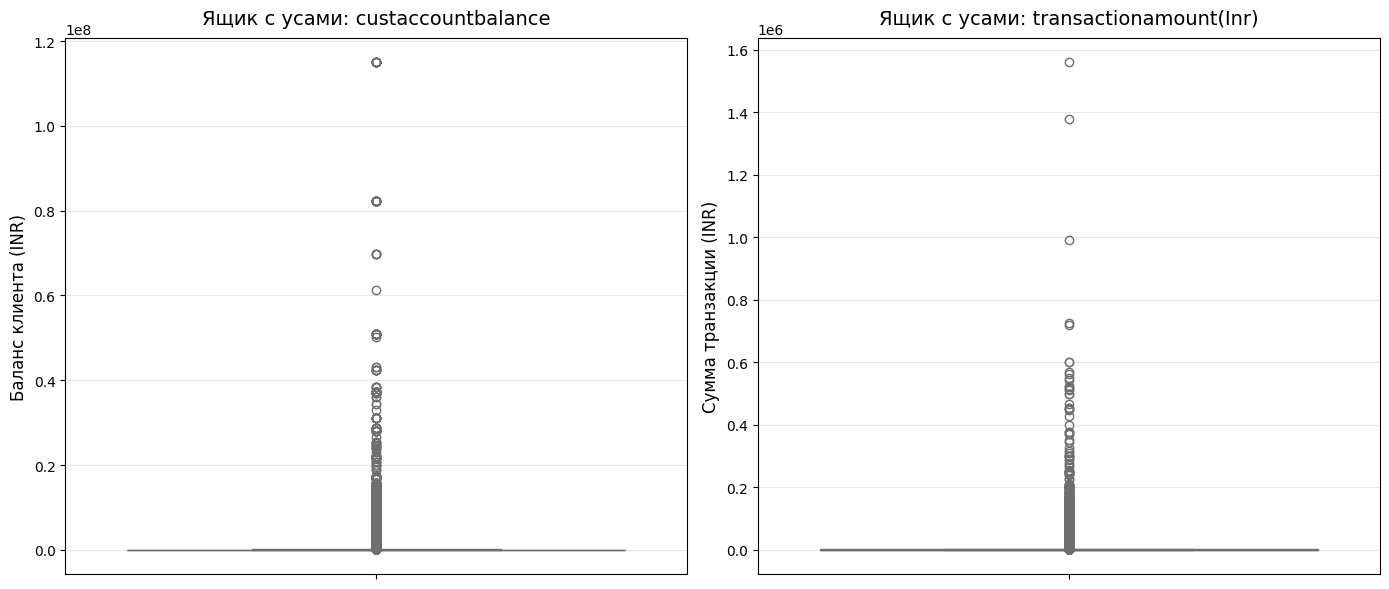

In [21]:
#4. Ящики с усами (boxplot) — анализ размаха и выбросов
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot для custaccountbalance
sns.boxplot(
    data=df_clean,
    y='custaccountbalance',
    ax=axes[0],
    color='skyblue'
)
axes[0].set_title('Ящик с усами: custaccountbalance', fontsize=14, pad=10)
axes[0].set_ylabel('Баланс клиента (INR)', fontsize=12)

axes[0].grid(True, axis='y', alpha=0.3)


# Boxplot для transactionamount(Inr)
sns.boxplot(
    data=df_clean,
    y='transactionamount(Inr)',
    ax=axes[1],
    color='lightcoral'
)
axes[1].set_title('Ящик с усами: transactionamount(Inr)', fontsize=14, pad=10)
axes[1].set_ylabel('Сумма транзакции (INR)', fontsize=12)
axes[1].grid(True, axis='y', alpha=0.3)


plt.tight_layout()
plt.show()

Анализ «ящика с усами» (box plot) для показателей «CustAccountBalance» и «TransactionAmount (INR)»
 показывает, что
- **Размах значений:** -  баланс имеет гораздо более широкий диапазон (до 100 млн INR), чем сумма транзакции (до 1 млн INR) — логично, так как баланс аккумулирует средства, а транзакция фиксирует единичное движение.
-  **Асимметрия:** - оба распределения асимметричны, но у баланса асимметрия более выражена (больше влияния крупных значений).
-  **Выбросы:**  -  в обоих случаях присутствуют, но у баланса они значительно крупнее (на порядки выше, чем у транзакций).
 -  **Концентрация в нуле:** - оба показателя демонстрируют наличие нулевых значений, что требует дополнительного анализа.

In [22]:
# 5  изучить возраст клиентов (визуализировать)

In [23]:
# Calculate age based on transaction date and date of birth
# Handle cases where dob year might be in the future due to 2-digit year interpretation (e.g., '57' as 2057 instead of 1957)

def calculate_age(row):
    dob_year = row['customerdob'].year
    transaction_year = row['transactiondate'].year

    if dob_year > transaction_year: # If birth year is in the future, assume it's 100 years earlier
        return transaction_year - (dob_year - 100)
    else:
        return transaction_year - dob_year

df['age'] = df.apply(calculate_age, axis=1)

# Display descriptive statistics for age
print("Описательная статистика возраста клиентов:")
print(df['age'].describe())


Описательная статистика возраста клиентов:
count    985322.000000
mean         31.029537
std           8.757113
min           0.000000
25%          25.000000
50%          29.000000
75%          34.000000
max          98.000000
Name: age, dtype: float64


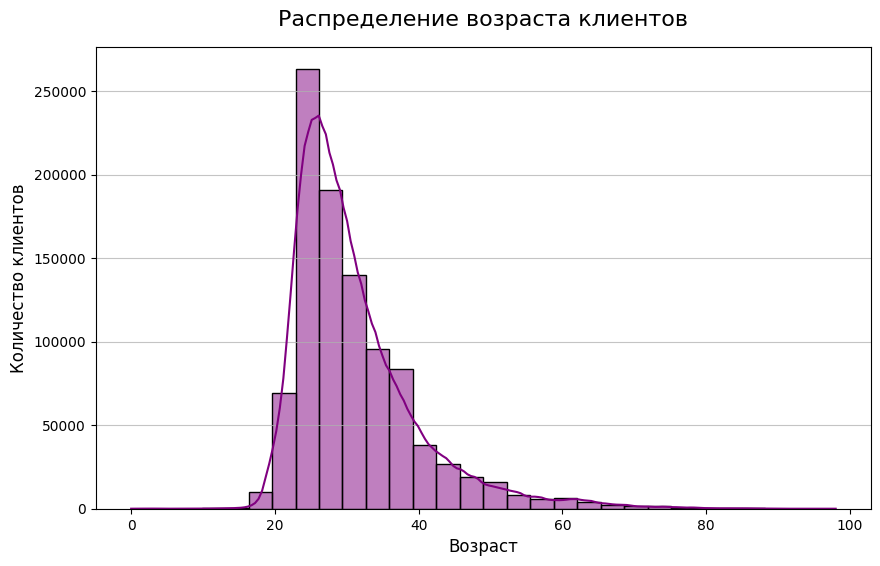

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='purple')
plt.title('Распределение возраста клиентов', fontsize=16, pad=15)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

5   возраст наибольшего числа клиентов - -25 лет.


In [25]:
# 6 изучить пол клиентов (визуализировать)

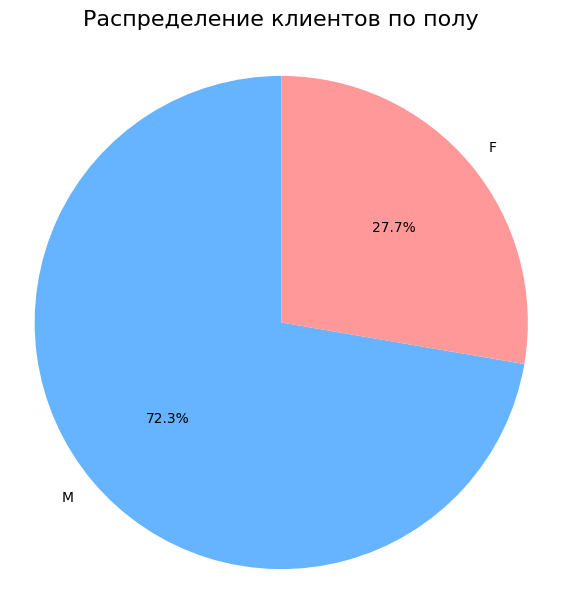

In [26]:
gender_counts = df['custgender'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('Распределение клиентов по полу', fontsize=16, pad=20)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

6   Половой состав клиентов: мужчины - 72,3%, женщины - 27,7%


In [27]:
# 7 изучить место жительства клиентов (визуализировать)

/tmp/ipython-input-3848756389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')


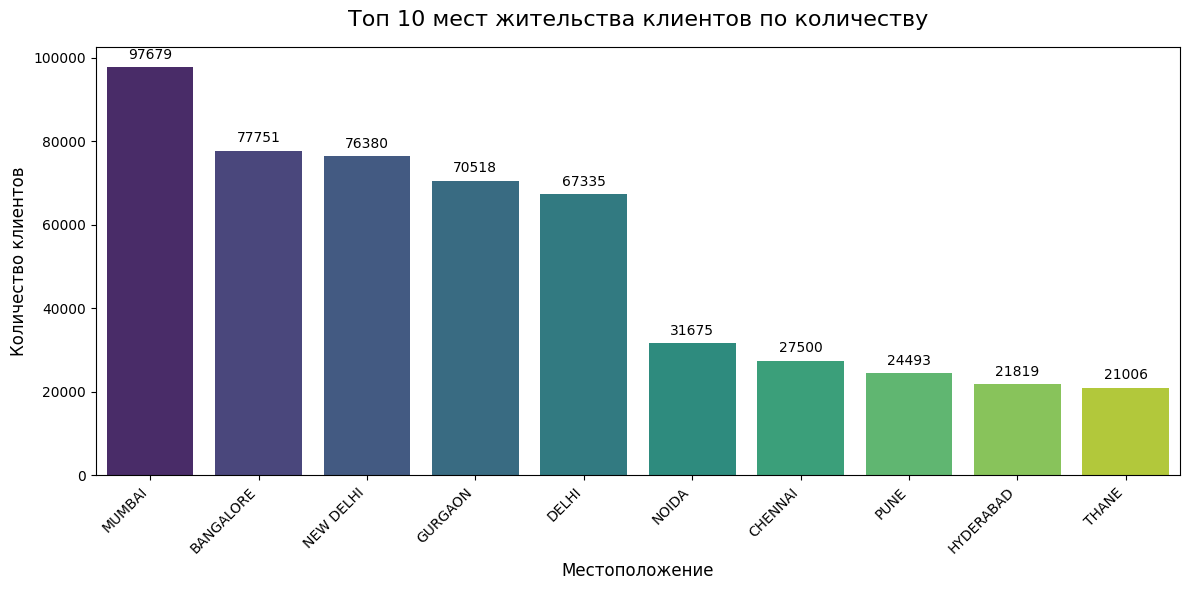

In [28]:
location_counts = df['custlocation'].value_counts().head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Топ 10 мест жительства клиентов по количеству', fontsize=16, pad=15)
plt.xlabel('Местоположение', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add client counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()

7 Анализ места жительства клиентов позывает первая тройка по кол-ву клиетов:  Мумбай, Бангалор, Нью Дели.

In [29]:
 # 8 динамику транзакций по дате (в кол-ве TransactionID)

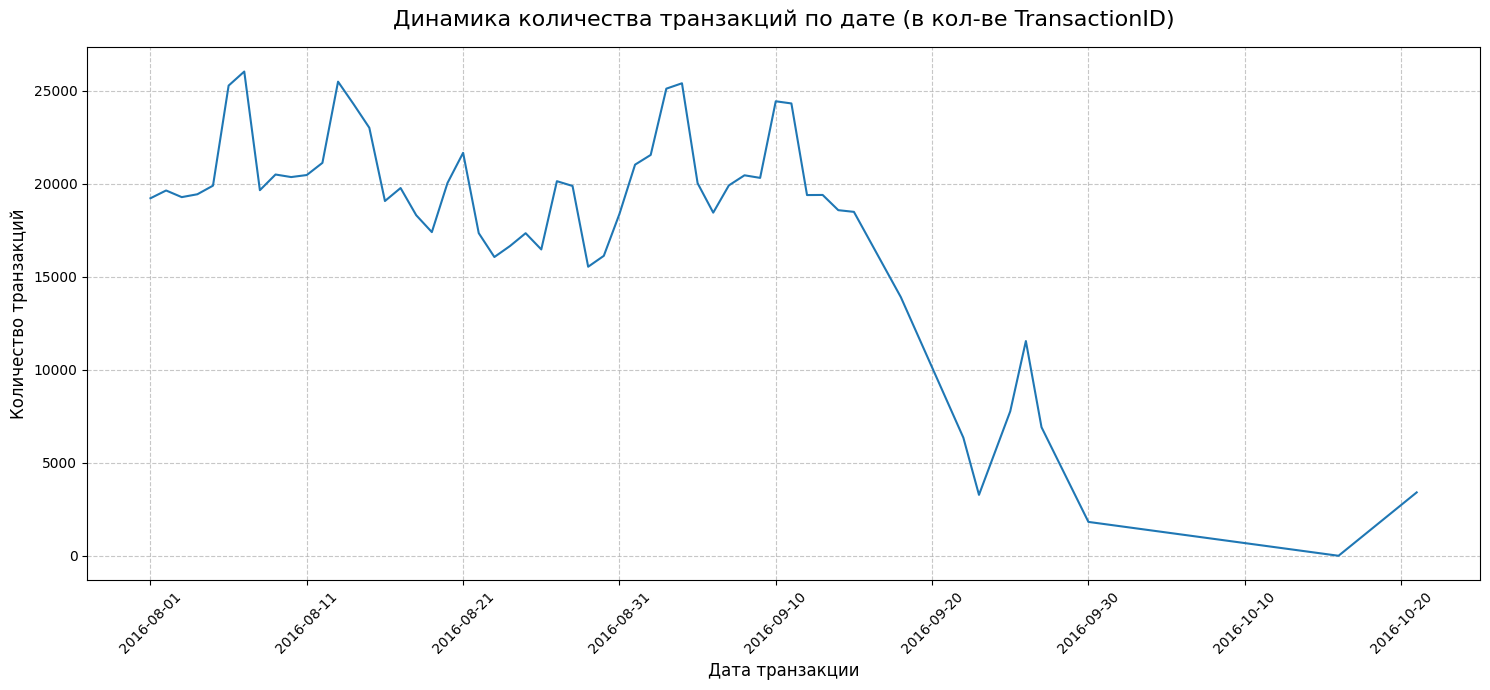

In [30]:
transactions_count_by_date = df.groupby('transactiondate')['transactionid'].count().reset_index()
transactions_count_by_date.columns = ['transactiondate', 'transaction_count']

transactions_amount_by_date = df.groupby('transactiondate')['transactionamount(Inr)'].sum().reset_index()
transactions_amount_by_date.columns = ['transactiondate', 'total_transaction_amount']

plt.figure(figsize=(15, 7))
sns.lineplot(data=transactions_count_by_date, x='transactiondate', y='transaction_count')
plt.title('Динамика количества транзакций по дате (в кол-ве TransactionID)', fontsize=16, pad=15)
plt.xlabel('Дата транзакции', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Set x-axis ticks to be every 10 days
min_date = transactions_amount_by_date['transactiondate'].min()
max_date = transactions_amount_by_date['transactiondate'].max()
date_range = pd.date_range(start=min_date, end=max_date, freq='10D')
plt.xticks(date_range, rotation=45)

plt.tight_layout()
plt.show()

Весь август и половину сентяября кол-во транзакций держитя примерно на одном уровне 20000, а к середине октября падает почти до нуля.


In [31]:
# 9 динамику транзакций по дате (в сумме TransactionAmount)

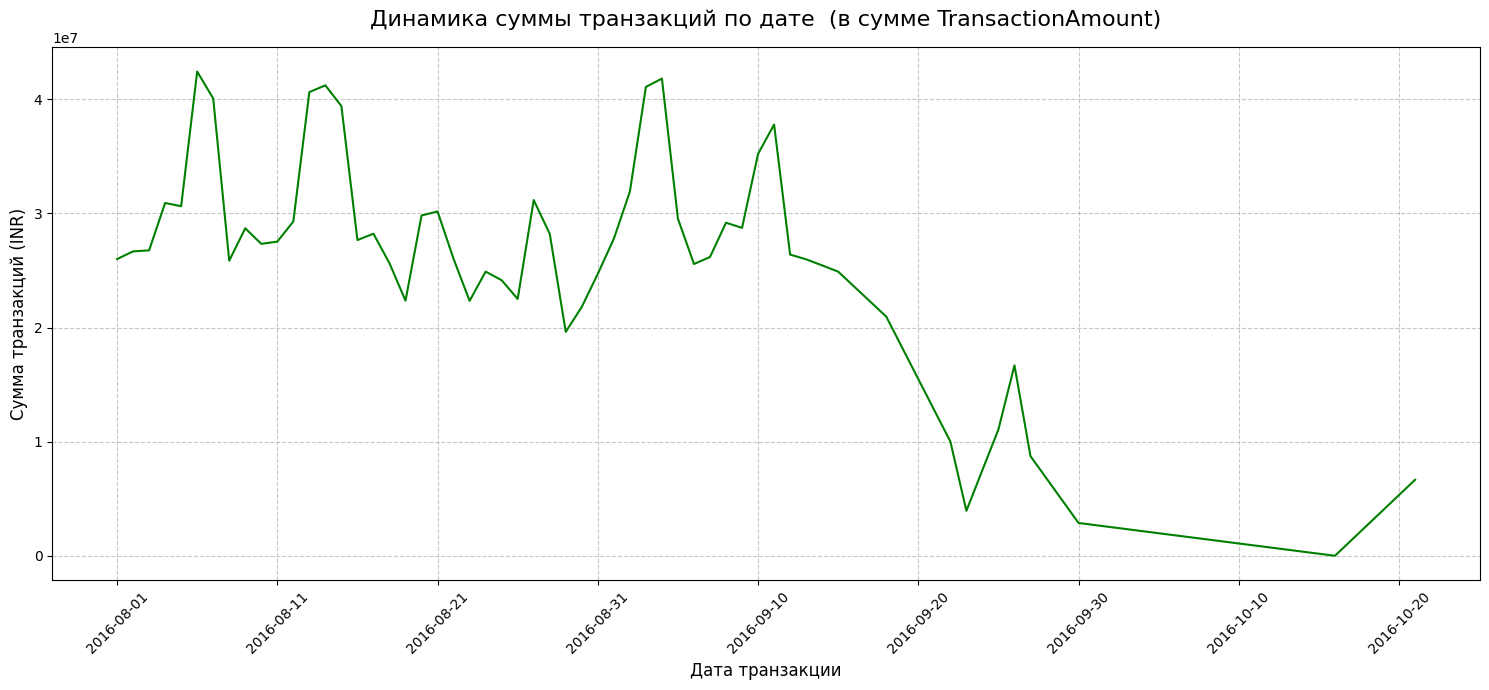

In [32]:
transactions_amount_by_date = df.groupby('transactiondate')['transactionamount(Inr)'].sum().reset_index()
transactions_amount_by_date.columns = ['transactiondate', 'total_transaction_amount']

plt.figure(figsize=(15, 7))
sns.lineplot(data=transactions_amount_by_date, x='transactiondate', y='total_transaction_amount', color='green')
plt.title('Динамика суммы транзакций по дате  (в сумме TransactionAmount)', fontsize=16, pad=15)
plt.xlabel('Дата транзакции', fontsize=12)
plt.ylabel('Сумма транзакций (INR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks to be every 10 days
min_date = transactions_amount_by_date['transactiondate'].min()
max_date = transactions_amount_by_date['transactiondate'].max()
date_range = pd.date_range(start=min_date, end=max_date, freq='10D')
plt.xticks(date_range, rotation=45)

plt.tight_layout()
plt.show()

Динамика суммы транзакций ведет себя аналогично

In [33]:
# 10 разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

Возрастные группы

Деление на

In [34]:
import numpy as np

# Define age bin edges
bins = [0, 18, 25, 35, 50, 65, np.inf]

# Define corresponding labels for the age bins
labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '66+']

# Create a new column 'age_group' by categorizing the 'age' column into the defined bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Display the value counts for the new 'age_group' column to verify the categorization
print(df['age_group'].value_counts())
print(df.head())

age_group
26-35    498815
19-25    267329
36-50    176050
51-65     32541
66+        7072
0-18       3515
Name: count, dtype: int64
  transactionid customerid customerdob custgender custlocation  \
0            T1   C5841053  1994-01-10          F   JAMSHEDPUR   
1            T2   C2142763  2057-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   custaccountbalance transactiondate  transactiontime  \
0            17819.05      2016-08-02           143207   
1             2270.69      2016-08-02           141858   
2            17874.44      2016-08-02           142712   
3           866503.21      2016-08-02           142714   
4             6714.43      2016-08-02           181156   

   transactionamount(Inr)  age age_group  
0                    25.0   22     19-25  
1                 27999.0   59     5

Визуализация

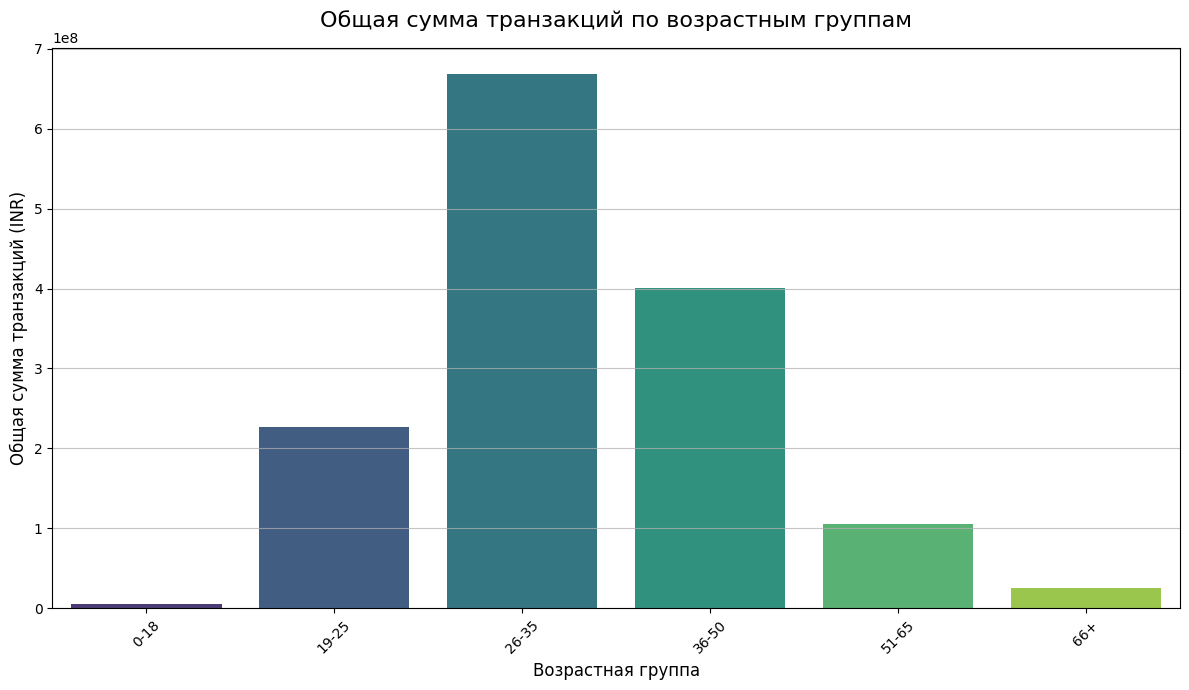

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

total_transaction_amount_by_age = df.groupby('age_group', observed=False)['transactionamount(Inr)'].sum().reset_index()
total_transaction_amount_by_age = total_transaction_amount_by_age.sort_values(by='transactionamount(Inr)', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='age_group', y='transactionamount(Inr)', data=total_transaction_amount_by_age, palette='viridis', hue='age_group', legend=False)
plt.title('Общая сумма транзакций по возрастным группам', fontsize=16, pad=15)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Общая сумма транзакций (INR)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Согласно результатам анализа, наиболее платежеспособной является возрастная группа «26–35 лет».
*   Клиенты были успешно разделены на шесть возрастных групп: «0–18 лет», «19–25 лет», «26–35 лет», «36–50 лет», «51–65 лет» и «66+ лет».
*   Возрастная группа «от 26 до 35 лет» была самой многочисленной среди всех категорий.
*   Возрастная группа «от 26 до 35 лет» также совершила наибольшее количество транзакций, что делает её самой платёжеспособной группой, за которой следует возрастная группа «от 36 до 50 лет».
*   На гистограмме наглядно показаны общие суммы транзакций в этих возрастных группах, что ясно демонстрирует доминирование группы «от 26 до 35 лет».


In [36]:
# 11 посмотреть распредление транзакций по локации – вывести топ 10 по кол-ву транзакций/сумме транзакций

Количество транзакций

Top 10 locations by transaction count:
     custlocation  transaction_count
4625       MUMBAI              97679
672     BANGALORE              77751
5066    NEW DELHI              76380
2689      GURGAON              70518
1805        DELHI              67335
5151        NOIDA              31675
1409      CHENNAI              27500
5843         PUNE              24493
2954    HYDERABAD              21819
7300        THANE              21006


/tmp/ipython-input-2948211638.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='custlocation', y='transaction_count', data=top_10_locations, palette='viridis')


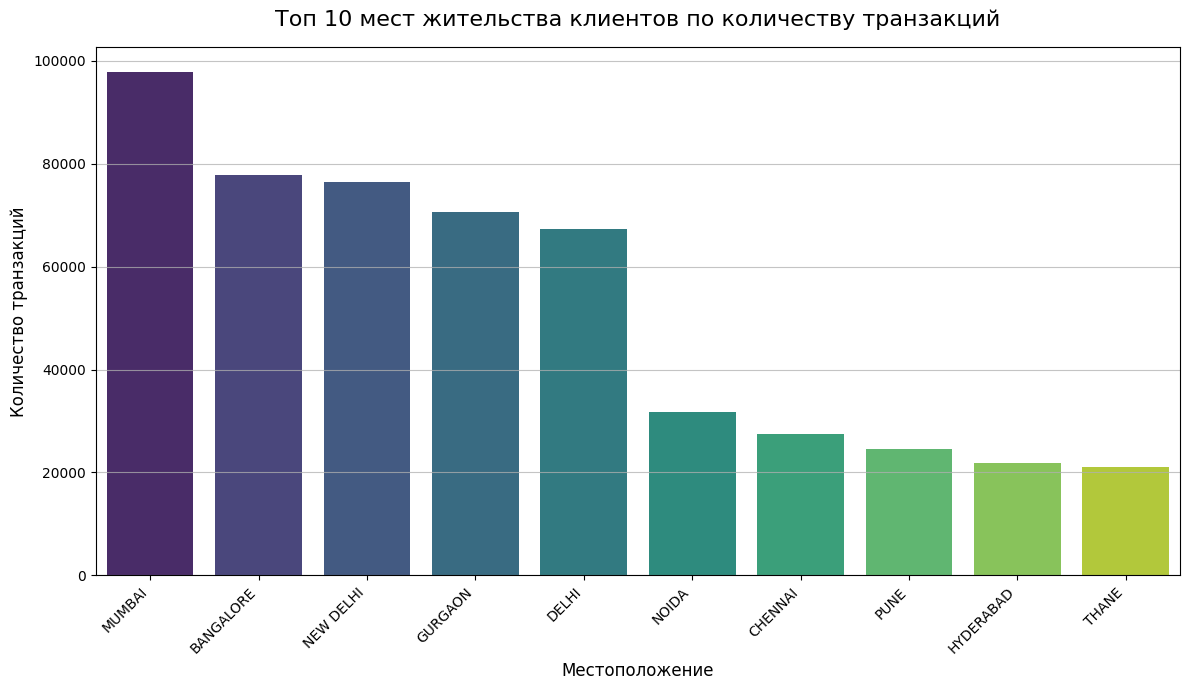

In [37]:
location_transaction_counts = df.groupby('custlocation')['transactionid'].count().reset_index()
location_transaction_counts.columns = ['custlocation', 'transaction_count']

top_10_locations = location_transaction_counts.sort_values(by='transaction_count', ascending=False).head(10)
#print("Total transaction amount by age group:")
#print(total_transaction_amount_by_age)


print("Top 10 locations by transaction count:")
print(top_10_locations)

# Visualize top 10 locations by transaction count
plt.figure(figsize=(12, 7))
sns.barplot(x='custlocation', y='transaction_count', data=top_10_locations, palette='viridis')
plt.title('Топ 10 мест жительства клиентов по количеству транзакций', fontsize=16, pad=15)
plt.xlabel('Местоположение', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Сумма транзакций

Top 10 locations by total transaction amount:
     custlocation  total_transaction_amount
4625       MUMBAI              1.616925e+08
5066    NEW DELHI              1.305968e+08
672     BANGALORE              1.054833e+08
2689      GURGAON              1.011668e+08
1805        DELHI              9.302718e+07
5151        NOIDA              4.189667e+07
3740      KOLKATA              4.072906e+07
1409      CHENNAI              3.824579e+07
5843         PUNE              3.496158e+07
2954    HYDERABAD              3.085922e+07


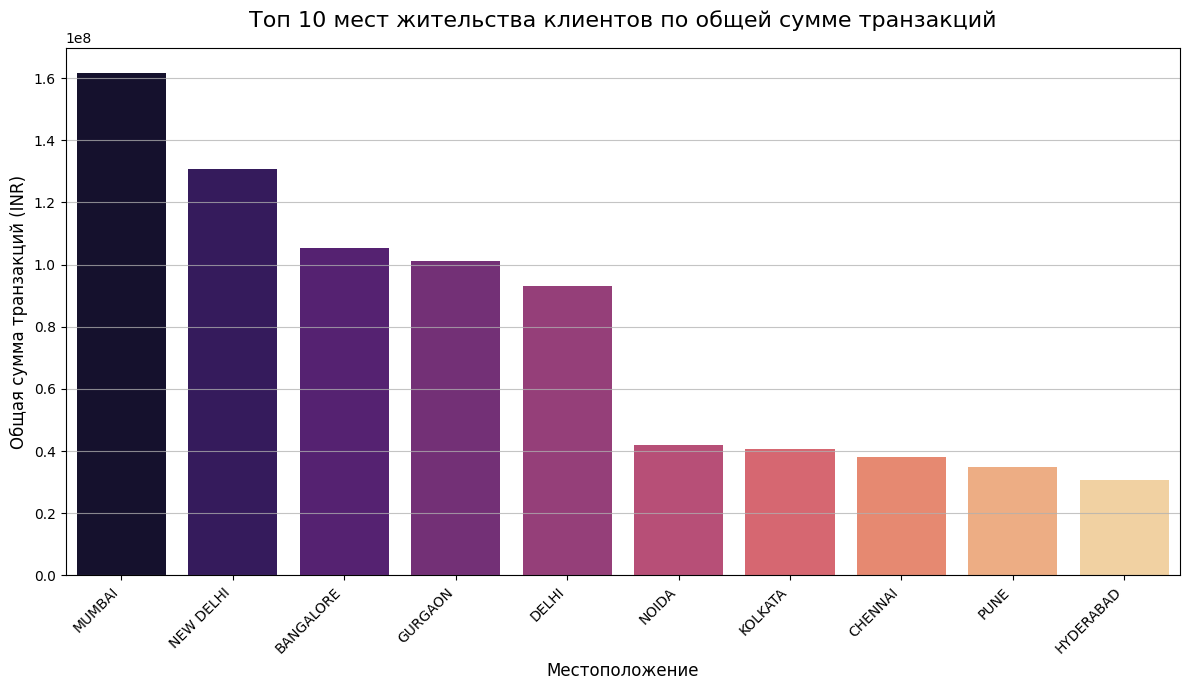

In [38]:
total_transaction_amount_by_location = df.groupby('custlocation')['transactionamount(Inr)'].sum().reset_index()
total_transaction_amount_by_location.columns = ['custlocation', 'total_transaction_amount']

top_10_locations_by_amount = total_transaction_amount_by_location.sort_values(by='total_transaction_amount', ascending=False).head(10)

print("Top 10 locations by total transaction amount:")
print(top_10_locations_by_amount)

plt.figure(figsize=(12, 7))
sns.barplot(x='custlocation', y='total_transaction_amount', data=top_10_locations_by_amount, palette='magma', hue='custlocation', legend=False)
plt.title('Топ 10 мест жительства клиентов по общей сумме транзакций', fontsize=16, pad=15)
plt.xlabel('Местоположение', fontsize=12)
plt.ylabel('Общая сумма транзакций (INR)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


Чтобы определить общие и уникальные местоположения в топ-10 списках по количеству транзакций и общей сумме транзакций, я извлеку столбцы custlocation из DataFrames top_10_locations и top_10_locations_by_amount, преобразую их в наборы, а затем выполню операции пересечения и разности наборов,

In [39]:
set_top_10_by_count = set(top_10_locations['custlocation'])
set_top_10_by_amount = set(top_10_locations_by_amount['custlocation'])

# Common locations
common_locations = set_top_10_by_count.intersection(set_top_10_by_amount)
print("Common locations in both top 10 lists:")
print(common_locations)

# Locations unique to top 10 by transaction count
unique_to_count = set_top_10_by_count.difference(set_top_10_by_amount)
print("\nLocations unique to top 10 by transaction count:")
print(unique_to_count)

# Locations unique to top 10 by total transaction amount
unique_to_amount = set_top_10_by_amount.difference(set_top_10_by_count)
print("\nLocations unique to top 10 by total transaction amount:")
print(unique_to_amount)

Common locations in both top 10 lists:
{'GURGAON', 'BANGALORE', 'PUNE', 'NOIDA', 'CHENNAI', 'HYDERABAD', 'NEW DELHI', 'DELHI', 'MUMBAI'}

Locations unique to top 10 by transaction count:
{'THANE'}

Locations unique to top 10 by total transaction amount:
{'KOLKATA'}


11. Сравнение 10 крупнейших городов по количеству транзакций и общей сумме транзакций показывает следующее:
*   **Общие города**: в обоих списках встречаются девять общих городов: «Мумбаи», «Бангалор», «Нью-Дели», «Гургаон», «Дели», «Ноида», «Ченнаи», «Пуна» и «Хайдарабад». Это указывает на то, что в этих крупных городских центрах наблюдается стабильно высокая активность и стоимость транзакций.
*   **Уникальность по количеству транзакций**: «Тане» входит в топ-10 по количеству транзакций. Это говорит о том, что в Тане большой объём транзакций, но их стоимость относительно невысока, что приводит к снижению общей стоимости транзакций.
*   **Уникальность по общей сумме транзакций**: «Колката» входит в топ-10 по общей сумме транзакций. Это означает, что, хотя в Калькутте может быть меньше транзакций, чем в таких местах, как Тейн, сумма транзакций в Калькутте значительно выше, что позволяет ей входить в топ-10.

### Основные выводы анализа данных
*   **Сильное пересечение**: большое количество общих мест (9 из 10) указывает на то, что самые густонаселённые и экономически активные города, как правило, лидируют как по количеству, так и по общей сумме транзакций.
*   **Разница в объеме и стоимости**: Тане — пример района, где объем транзакций *выше*, а их стоимость относительно ниже. С другой стороны, Калькутта — пример района, где более высокая *стоимость* транзакции вносит значительный вклад в общую сумму, даже если количество транзакций не так велико.
*   **Доминирование Мумбаи**: Мумбаи неизменно занимает высокие позиции в обеих категориях, подтверждая свой статус основного финансового центра с высоким объемом и стоимостью транзакций.

по средней сумме транзакций



 Чтобы вычислить среднюю сумму транзакции в зависимости от местоположения клиента, я сгруппирую DataFrame по параметру 'custlocation' и вычислю среднее значение 'transactionamount(Inr)', сохранив результат в новом DataFrame,


In [41]:
average_transaction_amount_by_location = df.groupby('custlocation')['transactionamount(Inr)'].mean().reset_index()
average_transaction_amount_by_location.columns = ['custlocation', 'average_transaction_amount']

print("Average transaction amount by location:")
print(average_transaction_amount_by_location.head(10))

Average transaction amount by location:
               custlocation  average_transaction_amount
0  (154) BHASKOLA FARIDABAD                  540.031818
1   (BENAKA MDTS) BANGALORE                  163.907143
2                (DT) HOSUR                 1398.191818
3                (E) MUMBAI                 1717.903864
4        (E) THANE SECTOR 3                  410.000000
5     (EAST) DAHISAR MUMBAI                  594.000000
6             (EAST) MUMBAI                 1760.520385
7              (EAST) THANE                  271.051364
8           (INDIA ) NAGPUR                 3242.025000
9      (KH) TAL MULSHI PUNE                  790.310000



 На предыдущем этапе мы успешно рассчитали среднюю сумму транзакции по местоположению. Теперь я отсортирую этот DataFrame, чтобы определить 10 местоположений с самой высокой средней суммой транзакции, а затем визуализирую эту информацию с помощью гистограммы,

Top 10 locations by average transaction amount:
                 custlocation  average_transaction_amount
6268                 ROOMFORD               117621.000000
4685                  MUNCHEN               112592.857143
4485            MILTON KEYNES               103579.000000
4917               NAPERVILLE                87658.750000
5677  PHASE-01 HINJEWADI PUNE                60000.000000
8068            WEST HARTFORD                54107.500000
2209      EAST SIKKIM GANGTOK                52984.432500
5771           PORT HARTCOURT                51586.500000
6954                 SOUTHALL                50770.000000
2486         GATE NO 4 MUMBAI                50584.294091


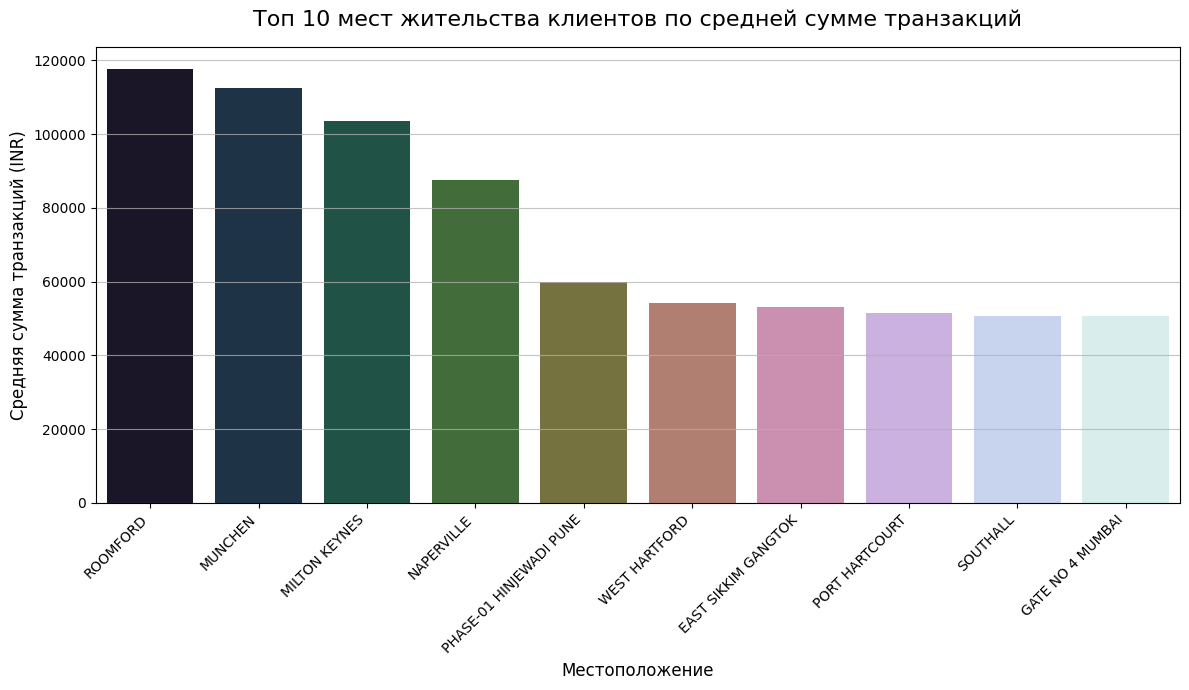

In [42]:
top_10_locations_by_avg_amount = average_transaction_amount_by_location.sort_values(by='average_transaction_amount', ascending=False).head(10)

print("Top 10 locations by average transaction amount:")
print(top_10_locations_by_avg_amount)

plt.figure(figsize=(12, 7))
sns.barplot(x='custlocation', y='average_transaction_amount', data=top_10_locations_by_avg_amount, palette='cubehelix', hue='custlocation', legend=False)
plt.title('Топ 10 мест жительства клиентов по средней сумме транзакций', fontsize=16, pad=15)
plt.xlabel('Местоположение', fontsize=12)
plt.ylabel('Средняя сумма транзакций (INR)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Анализ средних сумм транзакций в зависимости от местоположения выявляет интересные закономерности в сравнении с количеством транзакций и их общей суммой:
*   В топ-10 локаций по средней сумме транзакций входит ряд локаций, для которых в первую очередь характерны очень высокие суммы отдельных транзакций (например, «ROOMFORD» — 117 621 индийских рупий, «MUNCHEN» — 112 592 индийских рупий).
*   Эти локации сильно отличаются от топ-10 локаций по количеству транзакций и общей сумме транзакций, среди которых преобладают крупные индийские города.
* Это говорит о том, что в местах с большим количеством транзакций и их общей суммой не обязательно самые высокие средние значения транзакций, и наоборот.

In [43]:
# 12 посмотреть распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты

In [44]:
# Проверка типа данных в столбце transactiontime
print(df['transactiontime'].dtype)
#Шаг 2. Преобразование миллисекунд в минуты
#Поскольку время транзакций хранится в миллисекундах, переведите его в минуты (1 минута = 60 000 миллисекунд):
#python
# Создание нового столбца с временем в минутах
df['transactiontime_minutes'] = df['transactiontime'] / 60000

# Пример вывода первых 5 строк с новым столбцом
print(df[['transactiontime', 'transactiontime_minutes']].head())
#Шаг 3. Расчёт среднего времени транзакций
#Вычислите среднее значение времени транзакций в минутах:
#python
# Среднее время транзакций
mean_time = df['transactiontime_minutes'].mean()
print(f'Среднее время транзакций: {mean_time:.2f} минут')

int64
   transactiontime  transactiontime_minutes
0           143207                 2.386783
1           141858                 2.364300
2           142712                 2.378533
3           142714                 2.378567
4           181156                 3.019267
Среднее время транзакций: 2.62 минут


count    985322.000000
mean          2.623907
std           0.854511
min           0.000000
25%           2.070700
50%           2.743750
75%           3.335850
max           3.932650
Name: transactiontime_minutes, dtype: float64


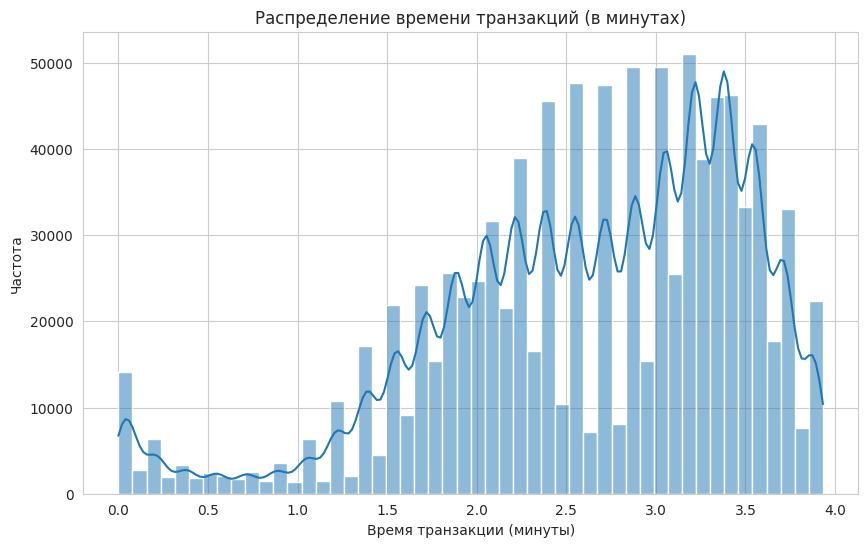

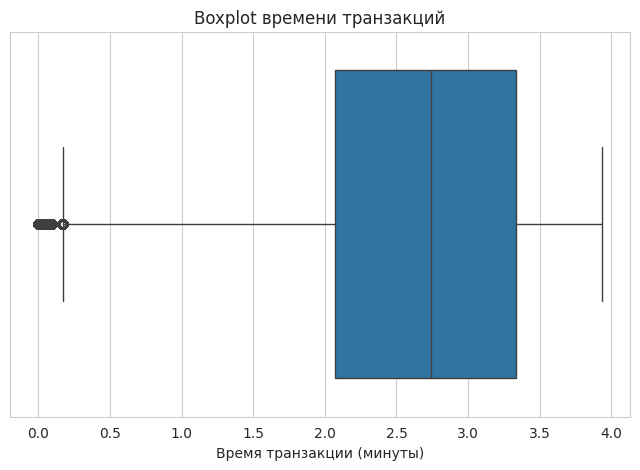

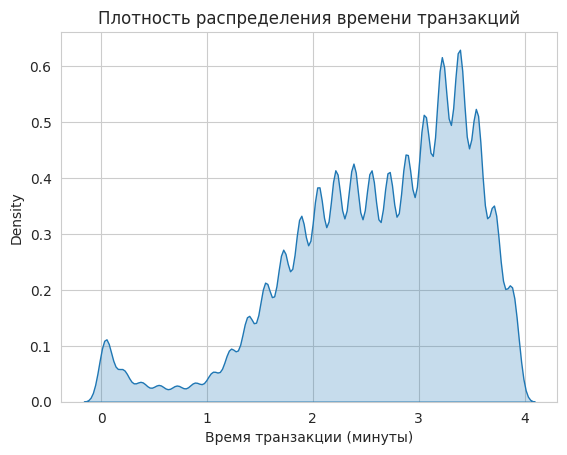

In [45]:
# Детальная статистика
time_stats = df['transactiontime_minutes'].describe()
print(time_stats)
#Это выведет:
#count — количество транзакций;
#mean — среднее время;
#std — стандартное отклонение;
#min — минимальное время;
#25%, 50% (медиана), 75% — квартили;
#max — максимальное время.
#Шаг 4. Визуализация распределения времени транзакций
#Используйте библиотеки matplotlib и seaborn для визуализации:
#python
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графиков
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Гистограмма распределения времени транзакций
sns.histplot(data=df, x='transactiontime_minutes', bins=50, kde=True)
plt.title('Распределение времени транзакций (в минутах)')
plt.xlabel('Время транзакции (минуты)')
plt.ylabel('Частота')
plt.show()
#Дополнительные графики:
#Boxplot (ящик с усами) для выявления выбросов:
#python
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='transactiontime_minutes')
plt.title('Boxplot времени транзакций')
plt.xlabel('Время транзакции (минуты)')
plt.show()
#График плотности (KDE) для более гладкого представления распределения:
#python
sns.kdeplot(data=df, x='transactiontime_minutes', fill=True)
plt.title('Плотность распределения времени транзакций')
plt.xlabel('Время транзакции (минуты)')
plt.show()

12. распределение времени транзакций

-----График времени транзакций показывает:  время транзакций варьируется от минимальных значений (около 0 минут) до максимальных (около 4 минут).
Общая тенденция: большинство транзакций сосредоточено в нижней части диапазона (до 2–3 минут), что указывает на относительно быстрые операции.

----Анализ ящика c усами показывает:
Основная масса транзакций (50%) укладывается в диапазон от ~2 до ~3,3 минут (границы ящика).
Медиана (Q2) находится около 2,7–2,8 минут — это среднее время транзакции по выборке.
Первый квартиль (Q1) — около 2 минут (25% транзакций выполняются быстрее этого времени).
Третий квартиль (Q3) — около 3,3 минут (75% транзакций укладываются в это время).
Усы (диапазон «нормальных» значений):
Нижний ус: начинается около 0 минут — минимальное «нормальное» время транзакции.
Верхний ус: заканчивается около 4 минут — максимальное «нормальное» время транзакции.
Это говорит о том, что 95% транзакций укладываются в диапазон 0–4 минут.
Выбросы:
На графике видны выбросы слева (несколько точек около 0 минут) — аномально быстрые транзакции.
Выбросов справа (длительных транзакций) не наблюдается, что говорит о хорошем контроле времени обработки.
Асимметрия:
Boxplot скошен влево (длинный ус слева, короткий — справа), что указывает на наличие аномально быстрых транзакций (близких к 0 минут).
Основная масса транзакций сконцентрирована в правой части распределения (ближе к медиане и Q3).
 Ключевые выводы:
Типичное время транзакции: 2,7–3,3 минуты (интерквартильный размах).
Минимальное время: около 0 минут (с учётом выбросов).
Максимальное «нормальное» время: около 4 минут.
Аномалии: присутствуют очень быстрые транзакции (выбросы слева), которые требуют дополнительного анализа.
Отсутствие длительных выбросов: это положительный сигнал — система обработки транзакций работает стабильно, без значительных задержек.

  ---- Анализ графика «Плотность распределения времени транзакций»
Пик плотности (мода): основной пик наблюдается около 3–3,3 минут. Это означает, что наиболее часто встречающееся время транзакции — около 3 минут.
Форма распределения: распределение асимметрично (скошено влево). Основная масса транзакций сосредоточена в правой части графика (ближе к 3 минутам), а левая часть (ближе к 0) имеет более низкие значения плотности.
Волнообразные колебания: небольшие пики и спады в диапазоне 1–3 минут указывают на многообразие типов транзакций с разным типичным временем обработки.


# Выводы

In [46]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

Выводы
# 1. Уникальных клиентов  в рассматриваемом периоде;  -    839081

# 2.  Общее количество транзакций;  -  985322

# 3. Среднее количество транзакций на клиента, ( деление общего количества транзакций на число уникальных клиентов;)  -   1.17

# 4. Распределение и размах величин custaccountbalance (баланс клиента ) и  transactionamount(Inr) (сумма транзакций)
	Описательная статистика:
       custaccountbalance  transactionamount(Inr)
count        9.853220e+05            9.853220e+05— количество наблюдений;
mean         1.060612e+05            1.452425e+03 — среднее;
std            8.179054e+05            6.139765e+03  — стандартное отклонение (разброс);
min          0.000000e+00            0.000000e+00  -    min / max — границы;
25%          4.582132e+03            1.510000e+02 — квартили
50%          1.600630e+04            4.310000e+02 - медиана
75%          5.375908e+04            1.125000e+03 — квартили
max          1.150355e+08            1.560035e+06  - min / max — границы;

Анализ гистограмм  **Распределение баланса клиента (CustAccountBalance)** —( верхний график.) и
 **Распределение суммы транзакций (TransactionAmount (INR))** —( нижний график.)  показывает, что  
Оба распределения **асимметричны с доминированием низких значений и редкими крупными выбросами**. Это характерно для ситуации, где **большая часть клиентов/операций — мелкие, а значительная масса средств/объёмов приходится на небольшую группу**

 Анализ «ящика с усами» (box plot) для показателей «CustAccountBalance» и «TransactionAmount (INR)»
 показывает, что
- **Размах значений:** -  баланс имеет гораздо более широкий диапазон (до 100 млн INR), чем сумма транзакции (до 1 млн INR) — логично, так как баланс аккумулирует средства, а транзакция фиксирует единичное движение.
-  **Асимметрия:** - оба распределения асимметричны, но у баланса асимметрия более выражена (больше влияния крупных значений).
-  **Выбросы:**  -  в обоих случаях присутствуют, но у баланса они значительно крупнее (на порядки выше, чем у транзакций).
 -  **Концентрация в нуле:** - оба показателя демонстрируют наличие нулевых значений, что требует дополнительного анализа.

# 5.  Возраст клиентов. Текущее состояние клиентов,  состояние на момент совершения транзакции;  -
 картинка распределения,
Описательная статистика возраста клиентов:
count    985322.000000 - количество наблюдений;
mean         31.029537 - среднее
std           8.757113 - стандартное отклонение (разброс)
min           0.000000-  min / max — границы
25%          25.000000— квартили
50%          29.000000 - медиана
75%          34.000000 — квартили
max          98.000000 - min / max — границы;

На графике распределения возраст наибольшего числа клиентов - -25 лет.

# 6. Половой состав клиентов: мужчины - 72,3%, женщины - 27,7%
# 7. Анализ места жительства клиентов позывает первая тройка по кол-ву клиетов:  Мумбай, Бангалор, Нью Дели.

# 8.  Динамика количества транзакций по датам,:
Весь август и половину сентяября кол-во транзакций держитя примерно на одном уровне 20000, а к середине октября падает почти до нуля.
# 9. Динамика суммы транзакций ведет себя аналогично

# 10. Согласно результатам анализа, наиболее платежеспособной является возрастная группа «26–35 лет».
*   Клиенты были успешно разделены на шесть возрастных групп: «0–18 лет», «19–25 лет», «26–35 лет», «36–50 лет», «51–65 лет» и «66+ лет».
*   Возрастная группа «от 26 до 35 лет» была самой многочисленной среди всех категорий.
*   Возрастная группа «от 26 до 35 лет» также совершила наибольшее количество транзакций, что делает её самой платёжеспособной группой, за которой следует возрастная группа «от 36 до 50 лет».
*   На гистограмме наглядно показаны общие суммы транзакций в этих возрастных группах, что ясно демонстрирует доминирование группы «от 26 до 35 лет».

# 11. Сравнение 10 крупнейших городов по количеству транзакций и общей сумме транзакций показывает следующее:
*   **Общие города**: в обоих списках встречаются девять общих городов: «Мумбаи», «Бангалор», «Нью-Дели», «Гургаон», «Дели», «Ноида», «Ченнаи», «Пуна» и «Хайдарабад». Это указывает на то, что в этих крупных городских центрах наблюдается стабильно высокая активность и стоимость транзакций.
*   **Уникальность по количеству транзакций**: «Тане» входит в топ-10 по количеству транзакций. Это говорит о том, что в Тане большой объём транзакций, но их стоимость относительно невысока, что приводит к снижению общей стоимости транзакций.
*   **Уникальность по общей сумме транзакций**: «Колката» входит в топ-10 по общей сумме транзакций. Это означает, что, хотя в Калькутте может быть меньше транзакций, чем в таких местах, как Тейн, сумма транзакций в Калькутте значительно выше, что позволяет ей входить в топ-10.

### Основные выводы анализа данных
*   **Сильное пересечение**: большое количество общих мест (9 из 10) указывает на то, что самые густонаселённые и экономически активные города, как правило, лидируют как по количеству, так и по общей сумме транзакций.
*   **Разница в объеме и стоимости**: Тане — пример района, где объем транзакций *выше*, а их стоимость относительно ниже. С другой стороны, Калькутта — пример района, где более высокая *стоимость* транзакции вносит значительный вклад в общую сумму, даже если количество транзакций не так велико.
*   **Доминирование Мумбаи**: Мумбаи неизменно занимает высокие позиции в обеих категориях, подтверждая свой статус основного финансового центра с высоким объемом и стоимостью транзакций.

### Анализ средних сумм транзакций в зависимости от местоположения выявляет интересные закономерности в сравнении с количеством транзакций и их общей суммой:
*   В топ-10 локаций по средней сумме транзакций входит ряд локаций, для которых в первую очередь характерны очень высокие суммы отдельных транзакций (например, «ROOMFORD» — 117 621 индийских рупий, «MUNCHEN» — 112 592 индийских рупий).
*   Эти локации сильно отличаются от топ-10 локаций по количеству транзакций и общей сумме транзакций, среди которых преобладают крупные индийские города.
* Это говорит о том, что в местах с большим количеством транзакций и их общей суммой не обязательно самые высокие средние значения транзакций, и наоборот.


# 12. распределение времени транзакций
-----График времени транзакций показывает:  время транзакций варьируется от минимальных значений (около 0 минут) до максимальных (около 4 минут).
Общая тенденция: большинство транзакций сосредоточено в нижней части диапазона (до 2–3 минут), что указывает на относительно быстрые операции.
----Анализ ящика c усами показывает:
Основная масса транзакций (50%) укладывается в диапазон от ~2 до ~3,3 минут (границы ящика).
Медиана (Q2) находится около 2,7–2,8 минут — это среднее время транзакции по выборке.
Первый квартиль (Q1) — около 2 минут (25% транзакций выполняются быстрее этого времени).
Третий квартиль (Q3) — около 3,3 минут (75% транзакций укладываются в это время).
Усы (диапазон «нормальных» значений):
Нижний ус: начинается около 0 минут — минимальное «нормальное» время транзакции.
Верхний ус: заканчивается около 4 минут — максимальное «нормальное» время транзакции.
Это говорит о том, что 95% транзакций укладываются в диапазон 0–4 минут.
Выбросы:
На графике видны выбросы слева (несколько точек около 0 минут) — аномально быстрые транзакции.
Выбросов справа (длительных транзакций) не наблюдается, что говорит о хорошем контроле времени обработки.
Асимметрия:
Boxplot скошен влево (длинный ус слева, короткий — справа), что указывает на наличие аномально быстрых транзакций (близких к 0 минут).
Основная масса транзакций сконцентрирована в правой части распределения (ближе к медиане и Q3).
 Ключевые выводы:
Типичное время транзакции: 2,7–3,3 минуты (интерквартильный размах).
Минимальное время: около 0 минут (с учётом выбросов).
Максимальное «нормальное» время: около 4 минут.
Аномалии: присутствуют очень быстрые транзакции (выбросы слева), которые требуют дополнительного анализа.
Отсутствие длительных выбросов: это положительный сигнал — система обработки транзакций работает стабильно, без значительных задержек.
  ---- Анализ графика «Плотность распределения времени транзакций»
Пик плотности (мода): основной пик наблюдается около 3–3,3 минут. Это означает, что наиболее часто встречающееся время транзакции — около 3 минут.
Форма распределения: распределение асимметрично (скошено влево). Основная масса транзакций сосредоточена в правой части графика (ближе к 3 минутам), а левая часть (ближе к 0) имеет более низкие значения плотности.
Волнообразные колебания: небольшие пики и спады в диапазоне 1–3 минут указывают на многообразие типов транзакций с разным типичным временем обработки.

